In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
response = requests.get(url)

if response.status_code == 200:
    with open("data.csv", "wb") as file:
        file.write(response.content)
    print("Dataset downloaded and saved as data.csv")
else:
    print("Failed to download the dataset")

Dataset downloaded and saved as data.csv


In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
pricelogs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

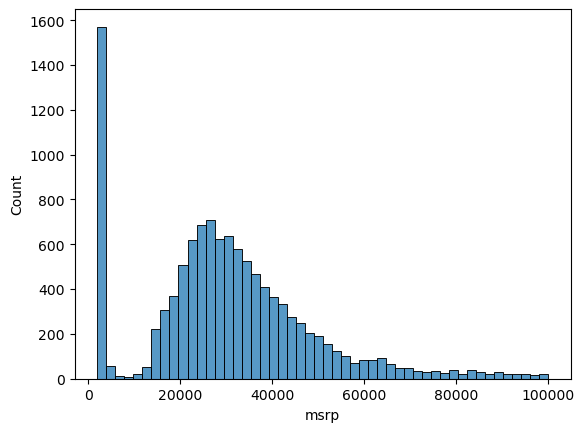

In [10]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

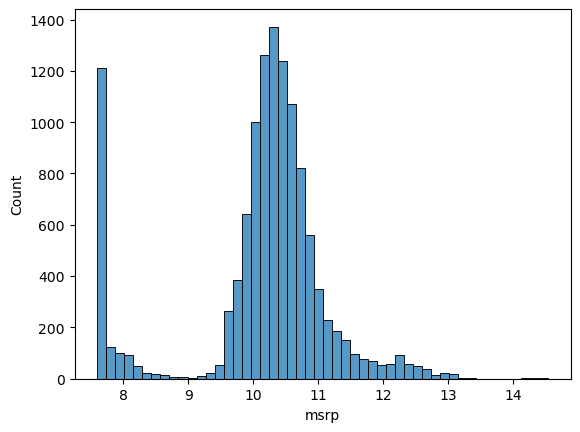

In [11]:
sns.histplot(pricelogs, bins = 50)

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

buraya kadar herşey normal

In [13]:
len(df)

11914

Datasetimizin uzunluğuunu görüyoruz buradan.

In [14]:
n = len(df)

In [15]:
n_val = int( n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test



In [16]:
print(n , n_train+ n_test + n_val)

11914 11914


In [17]:
n_val, n_train , n_test

(2382, 7150, 2382)

In [18]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val + n_test]
df_train = df.iloc[n_val+n_test : ]

buna random katmamız lazım aksi durumda düzgün örneklemler alamayız. Bu da sağlıklı veri toplayamadığımız için sağlıklı sonuçlar üretemememize sebebiyet verecektir.

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(2)
np.random.shuffle(idx)


In [21]:
df_train = df.iloc[idx[:n_train]]
df_val= df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_val+n_train : ]]

In [22]:
df_train = df_train.reset_index(drop=True)

In [23]:
df_val = df_val.reset_index(drop=True)

In [24]:
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [27]:
len(df_train)

7150

## 2.8 Car price baseline model

In [28]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [29]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [30]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [31]:
df_train[base].values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [32]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [33]:
X_train = df_train[base].fillna(0).values

In [34]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [35]:
w0, w = train_linear_regression(X_train,y_train)

In [36]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

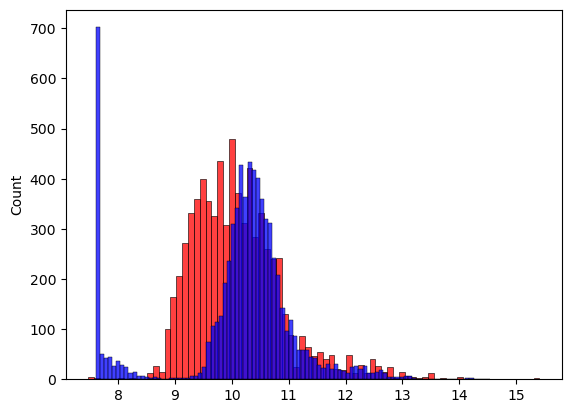

In [37]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color = 'blue')

## 2.9 RMSE

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    

In [39]:
rmse(y_train, y_pred)

0.7554192603920132

In [40]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [41]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608

In [42]:
def prepare_X(df):
    df['age'] = 2017/ - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)

In [44]:
df_train.dtypes


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                  float64
dtype: object

In [45]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5158484966499814

## simple Feature Engineering

In [46]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017/ - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5158484966499814

In [48]:
X_train.shape

(7150, 6)

## 2.12 Categorical Variables

In [49]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017/ - df.year
    features = base + ['age']
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [50]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5144221264192309

In [51]:
X_train.shape

(7150, 9)

In [52]:
w.shape

(9,)

In [53]:
w0.shape

()

In [54]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [55]:
df.make.nunique()

48

In [56]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [57]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017/ - df.year
    features = base + ['age']
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
        
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X 

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5062042219650785

<Axes: ylabel='Count'>

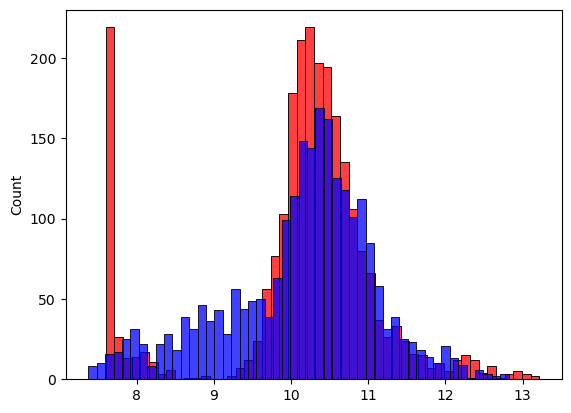

In [59]:
sns.histplot(y_val, color='red', bins=50)
sns.histplot(y_pred, color = 'blue',bins=50)

## regularization problem

In [60]:
def train_linear_regression(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r= 0.00001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5062099216239198

## using the model

In [62]:
for r in [0.0, 0.1, 0.01, 0.001,0.00001, 10, 1000, 100000, 0.0001, 0.00001]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r= r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)
    print (r, w0, score)

0.0 200.92013559690594 0.5062042219650785
0.1 44.60437121230636 0.66601624921298
0.01 146.43635318921645 0.5307684610847159
0.001 193.6693474278488 0.5071217963405854
1e-05 200.8448894938109 0.5062099216239198
10 3.7212930142359686 0.7405698887075416
1000 0.8767974543114018 1.045801724660364
100000 0.022557030798643664 1.5545418978065502
0.0001 200.17024901025277 0.5062646100660234
1e-05 200.8448894938109 0.5062099216239198


## Using the model

In [63]:
df_full_train = pd.concat([df_train, df_val ])



In [64]:
df_full_train = df_full_train.reset_index(drop= True)

In [65]:
X_full_train = prepare_X(df_full_train)



In [66]:
y_full_train = np.concatenate([y_train, y_val])

In [67]:
w0, w = train_linear_regression(X_full_train, y_full_train, r= 0.01)



In [68]:
w0, w

(157.9344723884354,
 array([ 4.62521633e-03,  4.99728117e-02, -2.10227012e-03,  1.26906833e-02,
        -1.20884169e-05,  1.48017885e+02, -8.99964719e-01, -1.03904819e+00,
        -8.49903774e-01, -1.80690295e-01, -1.14597129e-01,  9.68171590e-02,
        -2.28073930e-01, -3.11041433e-01]))

In [69]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test,y_pred)
print (w0, score)

157.9344723884354 0.5138392844337973


## Testing

In [70]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [71]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [72]:
X_small = prepare_X(df_small)


In [73]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.37316209])

In [74]:
np.expm1(y_pred)

array([31988.47079044])

In [75]:
y_test[20]

10.463131911491967

In [76]:
np.expm1(y_test[20])

35000.00000000001

önceki satırlarda ben artık bir modeli denemek için tutup prediction yaptırıyorum, sonrasında da gerçek değeriyle kıyasladım...

In [77]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [78]:
df.make[df.number_of_doors.isnull() == True]

4666    ferrari
6930      tesla
6931      tesla
6932      tesla
6933      tesla
6934      tesla
Name: make, dtype: object

In [79]:
df.iloc[11323]

make                            suzuki
model                           verona
year                              2004
engine_fuel_type                   NaN
engine_hp                        155.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   midsize
vehicle_style                    sedan
highway_mpg                         25
city_mpg                            17
popularity                         481
msrp                             18499
Name: 11323, dtype: object

Burada tesla meselesine gelmeden önce kapılarda eksik bilgiler varmış acaba hangileri diye datasetime baktım. bir gördüm ki teslanın kapı bilgileri girilmemiş. Belki eksik girilmiştir. belki de bilerek girilmemiştir. Ama ben 4 kapı olarak güncellemek istedim. birazdan bunun ferrari. versiyonunu da yapacağım.

In [80]:
specified_model = 'tesla'

df.loc[df['make'] == specified_model]

mean_value = df.loc[df['make'] == specified_model, 'number_of_doors'].mean()


mean_doors_for_specified_model = df[df['make'] == specified_model]['number_of_doors'].mean()

df.loc[(df['make'] == specified_model) & (df['number_of_doors'].isna()), 'number_of_doors'] = mean_doors_for_specified_model


df.loc[df['make'] == specified_model]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
6921,tesla,model_s,2014,electric,NaN,0.0,direct_drive,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,90,88,1391,79900
6922,tesla,model_s,2014,electric,NaN,0.0,direct_drive,rear_wheel_drive,4.0,"exotic,performance",large,sedan,97,94,1391,69900
6923,tesla,model_s,2014,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,94,86,1391,104500
6924,tesla,model_s,2014,electric,NaN,0.0,direct_drive,rear_wheel_drive,4.0,"exotic,high-performance",large,sedan,90,88,1391,93400
6925,tesla,model_s,2015,electric,NaN,0.0,direct_drive,rear_wheel_drive,4.0,"exotic,performance",large,sedan,97,94,1391,69900
6926,tesla,model_s,2015,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,performance",large,sedan,102,101,1391,75000
6927,tesla,model_s,2015,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,106,95,1391,85000
6928,tesla,model_s,2015,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,98,89,1391,105000
6929,tesla,model_s,2015,electric,NaN,0.0,direct_drive,rear_wheel_drive,4.0,"exotic,performance",large,sedan,90,88,1391,80000
6930,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,performance",large,sedan,105,102,1391,79500


In [81]:
specified_model = 'ferrari'

df.loc[df['make'] == specified_model]


mean_value = df.loc[df['make'] == specified_model, 'number_of_doors'].mean()


mean_doors_for_specified_model = df[df['make'] == specified_model]['number_of_doors'].mean()

df.loc[(df['make'] == specified_model) & (df['number_of_doors'].isna()), 'number_of_doors'] = mean_doors_for_specified_model


df.loc[df['make'] == specified_model]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
294,ferrari,360,2002,premium_unleaded_(required),400.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,15,10,2774,160829
295,ferrari,360,2002,premium_unleaded_(required),400.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,10,2774,140615
296,ferrari,360,2002,premium_unleaded_(required),400.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,10,2774,150694
297,ferrari,360,2002,premium_unleaded_(required),400.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,15,10,2774,170829
298,ferrari,360,2003,premium_unleaded_(required),400.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,15,10,2774,165986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,ferrari,ff,2013,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",large,coupe,16,11,2774,295000
4667,ferrari,ff,2014,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",large,coupe,16,11,2774,295000
4668,ferrari,ff,2015,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",large,coupe,16,11,2774,295000
10093,ferrari,superamerica,2005,premium_unleaded_(required),532.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,15,9,2774,281170


böylelikle artık tüm kapılar dolmuş oldu. Artık başka modellerde de eksik bilgi varsa onlara geçebilirim.


In [82]:


df.loc[11322, 'engine_fuel_type'] = 'regular_unleaded'
df.loc[11323, 'engine_fuel_type'] = 'regular_unleaded'
df.loc[11321, 'engine_fuel_type'] = 'regular_unleaded'


In [83]:
df.model[df.model == 'verona']

11321    verona
11322    verona
11323    verona
11324    verona
11325    verona
11326    verona
11327    verona
11328    verona
11329    verona
Name: model, dtype: object

In [84]:
df.engine_fuel_type.value_counts()

engine_fuel_type
regular_unleaded                                7175
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [96]:
df.isnull().sum()


make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp              66
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## en son burada kaldın. tüm arabaların hplerini bulun adam gibi değerler çıkarabilmek sonrasında devam etmekkkk

In [100]:
df[(df['engine_hp'].isnull())& (df['model'] == 'continental')]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2905,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,all_wheel_drive,4.0,luxury,large,sedan,25,17,61,55915
2906,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,27,18,61,62915
2907,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,27,18,61,53915
2908,lincoln,continental,2017,premium_unleaded_(recommended),NaN,6.0,automatic,all_wheel_drive,4.0,luxury,large,sedan,25,17,61,64915


In [92]:
df[(df['engine_hp'].isnull()) & (df['model'] == '500e')]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
539,fiat,500e,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,108,122,819,31800
540,fiat,500e,2016,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800
541,fiat,500e,2017,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800


In [93]:
df[df['model'] == '500e']

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
539,fiat,500e,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,108,122,819,31800
540,fiat,500e,2016,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800
541,fiat,500e,2017,electric,NaN,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800


In [95]:
specified_model = '500e'

df.loc[df['model'] == specified_model]



df.loc[(df['model'] == specified_model) & (df['engine_hp'].isna()), 'engine_hp'] = 111


df.loc[df['model'] == specified_model]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
539,fiat,500e,2015,electric,111.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,108,122,819,31800
540,fiat,500e,2016,electric,111.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800
541,fiat,500e,2017,electric,111.0,0.0,direct_drive,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,103,121,819,31800
